# CNN MNIST Lab

In [2]:
# 필요한 패키지 가져오기

import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [7]:
# 데이터 가져오기

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# 데이터 전처리

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
print(X_train.shape)

(50000, 32, 32, 3)


In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
# 목표 변수 전처리 - one-hot 인코딩

Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
# 모형 구조 정의하기

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(32, 32, 3)))
print(model.output_shape)

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

(None, 30, 30, 32)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                     

In [13]:
# 모형 학습 정의하기

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# 학습하기

history=model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5929 - accuracy: 0.4215
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2895 - accuracy: 0.5429
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1727 - accuracy: 0.5826
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1052 - accuracy: 0.6080
Epoch 5/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.0506 - accuracy: 0.6285
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0081 - accuracy: 0.6419
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9729 - accuracy: 0.6519
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9402 - accuracy: 0.6651
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9030 - accuracy: 0.6758
Epoch 10/10
1563/1563 [==============================] - 41s 26m

In [15]:
# 성능 평가하기

score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.9025425910949707, 0.6884999871253967]


In [17]:
#성능 그래프로 그리기

acc = history.history['accuracy']
loss = history.history['loss']

epoch_range = range(1, len(acc) + 1)
epoch_range

range(1, 11)

<Figure size 640x480 with 0 Axes>

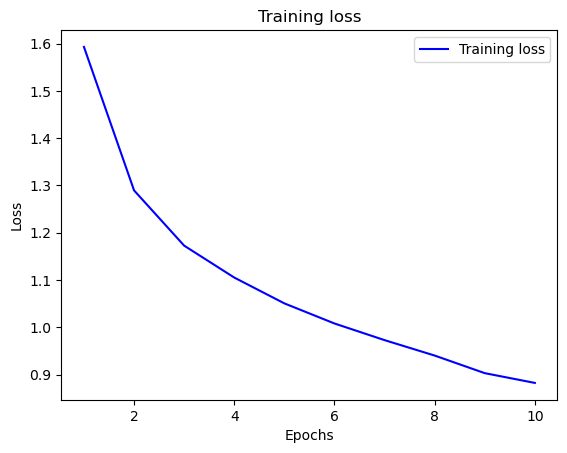

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(epoch_range, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

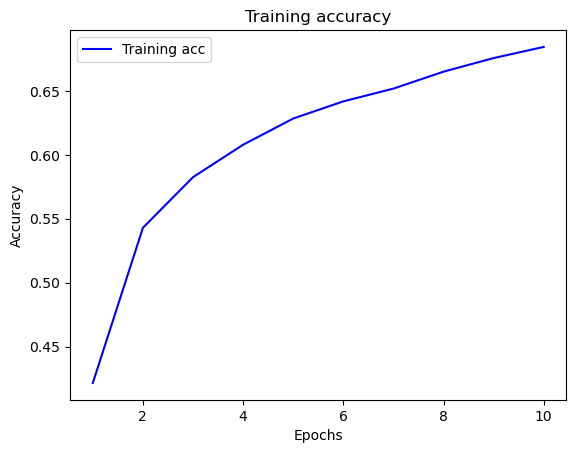

<Figure size 640x480 with 0 Axes>

In [19]:
plt.plot(epoch_range, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()